In [17]:
!git clone https://github.com/anagha1999/anlp-project/

Cloning into 'anlp-project'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 167 (delta 55), reused 101 (delta 27), pack-reused 23 (from 1)
Receiving objects: 100% (167/167), 39.37 MiB | 38.14 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [18]:
import os

# Navigate to the repository directory
repo_dir = 'anlp-project'
if os.path.exists(repo_dir):
    os.chdir(repo_dir)
    print(f"Changed directory to: {os.getcwd()}")
    # Pull the latest changes from the remote repository
    !git pull
    # Navigate back to the original directory if needed
    os.chdir('..')
    print(f"Changed directory back to: {os.getcwd()}")
else:
    print(f"Repository directory '{repo_dir}' not found. Please ensure it is cloned.")

Changed directory to: /content/anlp-project/anlp-project
Already up to date.
Changed directory back to: /content/anlp-project


# Cross-Cultural Statistical Analysis

This notebook performs statistical comparison of moral values across cultures using:
1. **Spearman Rank Correlation** - Captures whether relative ranking is consistent
2. **Jensen-Shannon Divergence (JSD)** - Captures similarity of moral value distributions

## Cultures Compared:
- **English**: Aesop's Fables (Western children's literature)
- **Tamil**: Thirukkural (Classical Tamil ethics)
- **Tamil**: Aathichudi (Tamil children's sayings)

## Literature Support:
- Spearman: Captures relative importance ranking (Hofstede cultural dimensions)
- JSD: Measures distribution similarity (used in computational cultural studies)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
from scipy.spatial.distance import jensenshannon
from scipy.stats import entropy

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Step 1: Load All Data

In [ ]:
# Load summary statistics (average scores per moral foundation)
english_summary = pd.read_csv('phase3_outputs/aesops_moral_summary.csv', index_col=0)
thirukkural_summary = pd.read_csv('phase3_outputs/thirukkural_moral_summary.csv', index_col=0)
aathichudi_summary = pd.read_csv('phase3_outputs/aathichudi_moral_summary.csv', index_col=0)

# Combine into single DataFrame
comparison_df = pd.DataFrame({
    'English_Aesop': english_summary['0'],
    'Tamil_Thirukkural': thirukkural_summary['0'],
    'Tamil_Aathichudi': aathichudi_summary['0']
})

print("Moral Foundation Average Scores:")
print("="*70)
print(comparison_df.round(4))
print("\n✓ Data loaded successfully")

Moral Foundation Average Scores:
                  English_Aesop  Tamil_Thirukkural  Tamil_Aathichudi
authority.vice           0.2597             0.4753            0.3965
authority.virtue         0.3076             0.5024            0.4245
care.vice                0.2787             0.4909            0.3973
care.virtue              0.3061             0.4902            0.4283
fairness.vice            0.2622             0.4830            0.4027
fairness.virtue          0.2775             0.4666            0.4072
loyalty.vice             0.2764             0.4677            0.3931
loyalty.virtue           0.2956             0.4997            0.4114
sanctity.vice            0.2913             0.5440            0.4328
sanctity.virtue          0.3066             0.5313            0.4521

✓ Data loaded successfully


## Step 2: Spearman Rank Correlation

### What it measures:
**Whether the relative ranking of moral values is consistent across cultures.**

### Example:
- English ranks: [sanctity=1st, care=2nd, loyalty=3rd]
- Tamil ranks: [sanctity=1st, care=2nd, loyalty=3rd]
- **High correlation** = Same relative importance

### Interpretation:
- **ρ > 0.7**: Strong agreement on moral priorities
- **ρ = 0.4-0.7**: Moderate agreement
- **ρ < 0.4**: Different moral priorities

In [ ]:
print("="*70)
print("SPEARMAN RANK CORRELATION ANALYSIS")
print("="*70)

# Calculate all pairwise correlations
comparisons = [
    ('English_Aesop', 'Tamil_Thirukkural'),
    ('English_Aesop', 'Tamil_Aathichudi'),
    ('Tamil_Thirukkural', 'Tamil_Aathichudi')
]

spearman_results = []

for col1, col2 in comparisons:
    rho, pval = spearmanr(comparison_df[col1], comparison_df[col2])
    spearman_results.append({
        'Comparison': f'{col1} vs {col2}',
        'Spearman_ρ': rho,
        'p-value': pval,
        'Significant': 'Yes' if pval < 0.05 else 'No'
    })

    print(f"\n{col1}")
    print(f"  vs")
    print(f"{col2}")
    print(f"  Spearman ρ = {rho:.4f}")
    print(f"  p-value = {pval:.4f}")

    if pval < 0.001:
        sig_str = "***"
    elif pval < 0.01:
        sig_str = "**"
    elif pval < 0.05:
        sig_str = "*"
    else:
        sig_str = "ns (not significant)"
    print(f"  Significance: {sig_str}")

    if rho > 0.7:
        print(f"  Interpretation: STRONG positive correlation - cultures rank morals similarly")
    elif rho > 0.4:
        print(f"  Interpretation: MODERATE positive correlation - some agreement on ranking")
    elif rho > 0.0:
        print(f"  Interpretation: WEAK positive correlation - different moral priorities")
    else:
        print(f"  Interpretation: NEGATIVE correlation - opposite moral priorities")

spearman_df = pd.DataFrame(spearman_results)
print("\n" + "="*70)
print("Summary Table:")
print(spearman_df.to_string(index=False))

SPEARMAN RANK CORRELATION ANALYSIS

English_Aesop
  vs
Tamil_Thirukkural
  Spearman ρ = 0.7091
  p-value = 0.0217
  Significance: *
  Interpretation: STRONG positive correlation - cultures rank morals similarly

English_Aesop
  vs
Tamil_Aathichudi
  Spearman ρ = 0.7939
  p-value = 0.0061
  Significance: **
  Interpretation: STRONG positive correlation - cultures rank morals similarly

Tamil_Thirukkural
  vs
Tamil_Aathichudi
  Spearman ρ = 0.7576
  p-value = 0.0111
  Significance: *
  Interpretation: STRONG positive correlation - cultures rank morals similarly

Summary Table:
                           Comparison  Spearman_ρ  p-value Significant
   English_Aesop vs Tamil_Thirukkural    0.709091 0.021666         Yes
    English_Aesop vs Tamil_Aathichudi    0.793939 0.006100         Yes
Tamil_Thirukkural vs Tamil_Aathichudi    0.757576 0.011143         Yes


## Step 3: Visualize Rankings


Moral Foundation Rankings (1=highest, 10=lowest):
                  English  Tamil_Thirukkural  Tamil_Aathichudi
authority.vice         10                  8                 9
authority.virtue        1                  3                 4
care.vice               6                  5                 8
care.virtue             3                  6                 3
fairness.vice           9                  7                 7
fairness.virtue         7                 10                 6
loyalty.vice            8                  9                10
loyalty.virtue          4                  4                 5
sanctity.vice           5                  1                 2
sanctity.virtue         2                  2                 1


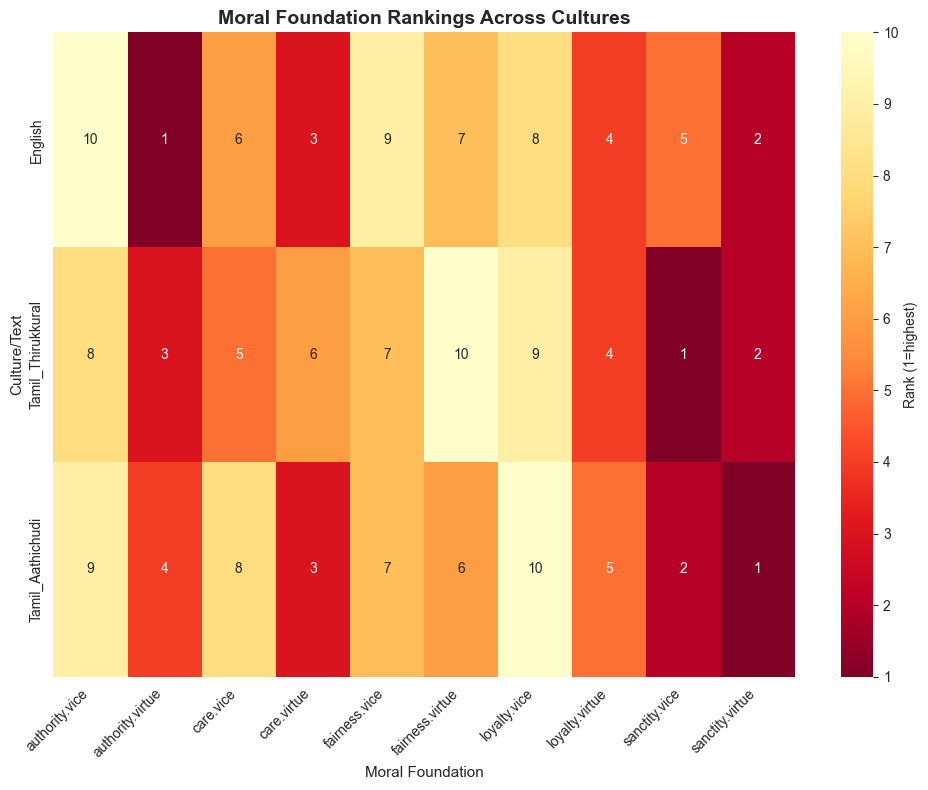


✓ Saved: cross_cultural_rankings_heatmap.png


In [ ]:
# Create ranking comparison table
rankings = pd.DataFrame({
    'English': comparison_df['English_Aesop'].rank(ascending=False).astype(int),
    'Tamil_Thirukkural': comparison_df['Tamil_Thirukkural'].rank(ascending=False).astype(int),
    'Tamil_Aathichudi': comparison_df['Tamil_Aathichudi'].rank(ascending=False).astype(int)
}, index=comparison_df.index)

print("\nMoral Foundation Rankings (1=highest, 10=lowest):")
print("="*70)
print(rankings)

# Heatmap of rankings
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(rankings.T, annot=True, fmt='d', cmap='YlOrRd_r',
            cbar_kws={'label': 'Rank (1=highest)'}, ax=ax)
ax.set_title('Moral Foundation Rankings Across Cultures', fontsize=14, fontweight='bold')
ax.set_xlabel('Moral Foundation', fontsize=11)
ax.set_ylabel('Culture/Text', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('phase3_outputs/cross_cultural_rankings_heatmap.png', dpi=300)
plt.show()

print("\n✓ Saved: cross_cultural_rankings_heatmap.png")

## Step 4: Jensen-Shannon Divergence (JSD)

### What it measures:
**How similar the overall distribution of moral values is between cultures.**

### Key difference from Spearman:
- **Spearman**: Only cares about ranking (1st, 2nd, 3rd...)
- **JSD**: Cares about actual distribution shape and frequencies

### Example:
```
Culture A: [0.5, 0.3, 0.2]  (sanctity dominates)
Culture B: [0.5, 0.3, 0.2]  (same distribution)
→ JSD = 0 (identical)

Culture A: [0.5, 0.3, 0.2]
Culture C: [0.33, 0.33, 0.34]  (balanced)
→ JSD > 0 (different)
```

### Interpretation:
- **JSD = 0**: Identical distributions
- **JSD < 0.1**: Very similar
- **JSD = 0.1-0.3**: Moderately different
- **JSD > 0.3**: Very different

In [ ]:
def normalize_distribution(scores):
    """
    Normalize scores to form a probability distribution.
    Required for JSD calculation.
    """
    # Ensure non-negative
    scores = scores - scores.min() + 1e-10
    # Normalize to sum to 1
    return scores / scores.sum()

# Normalize all distributions
dist_english = normalize_distribution(comparison_df['English_Aesop'])
dist_thirukkural = normalize_distribution(comparison_df['Tamil_Thirukkural'])
dist_aathichudi = normalize_distribution(comparison_df['Tamil_Aathichudi'])

print("="*70)
print("JENSEN-SHANNON DIVERGENCE (JSD) ANALYSIS")
print("="*70)

# Calculate JSD for all pairs
jsd_results = []

pairs = [
    ('English_Aesop', dist_english, 'Tamil_Thirukkural', dist_thirukkural),
    ('English_Aesop', dist_english, 'Tamil_Aathichudi', dist_aathichudi),
    ('Tamil_Thirukkural', dist_thirukkural, 'Tamil_Aathichudi', dist_aathichudi)
]

for name1, dist1, name2, dist2 in pairs:
    jsd = jensenshannon(dist1, dist2)
    jsd_results.append({
        'Comparison': f'{name1} vs {name2}',
        'JSD': jsd,
        'Similarity': 1 - jsd  # Convert to similarity score
    })

    print(f"\n{name1}")
    print(f"  vs")
    print(f"{name2}")
    print(f"  JSD = {jsd:.4f}")
    print(f"  Similarity = {1-jsd:.4f} (1=identical, 0=completely different)")

    if jsd < 0.1:
        print(f"  Interpretation: VERY SIMILAR distributions")
    elif jsd < 0.3:
        print(f"  Interpretation: MODERATELY DIFFERENT distributions")
    else:
        print(f"  Interpretation: VERY DIFFERENT distributions")

jsd_df = pd.DataFrame(jsd_results)
print("\n" + "="*70)
print("Summary Table:")
print(jsd_df.to_string(index=False))

JENSEN-SHANNON DIVERGENCE (JSD) ANALYSIS

English_Aesop
  vs
Tamil_Thirukkural
  JSD = 0.2958
  Similarity = 0.7042 (1=identical, 0=completely different)
  Interpretation: MODERATELY DIFFERENT distributions

English_Aesop
  vs
Tamil_Aathichudi
  JSD = 0.2328
  Similarity = 0.7672 (1=identical, 0=completely different)
  Interpretation: MODERATELY DIFFERENT distributions

Tamil_Thirukkural
  vs
Tamil_Aathichudi
  JSD = 0.2245
  Similarity = 0.7755 (1=identical, 0=completely different)
  Interpretation: MODERATELY DIFFERENT distributions

Summary Table:
                           Comparison      JSD  Similarity
   English_Aesop vs Tamil_Thirukkural 0.295815    0.704185
    English_Aesop vs Tamil_Aathichudi 0.232818    0.767182
Tamil_Thirukkural vs Tamil_Aathichudi 0.224547    0.775453


## Step 5: Visualize Distributions

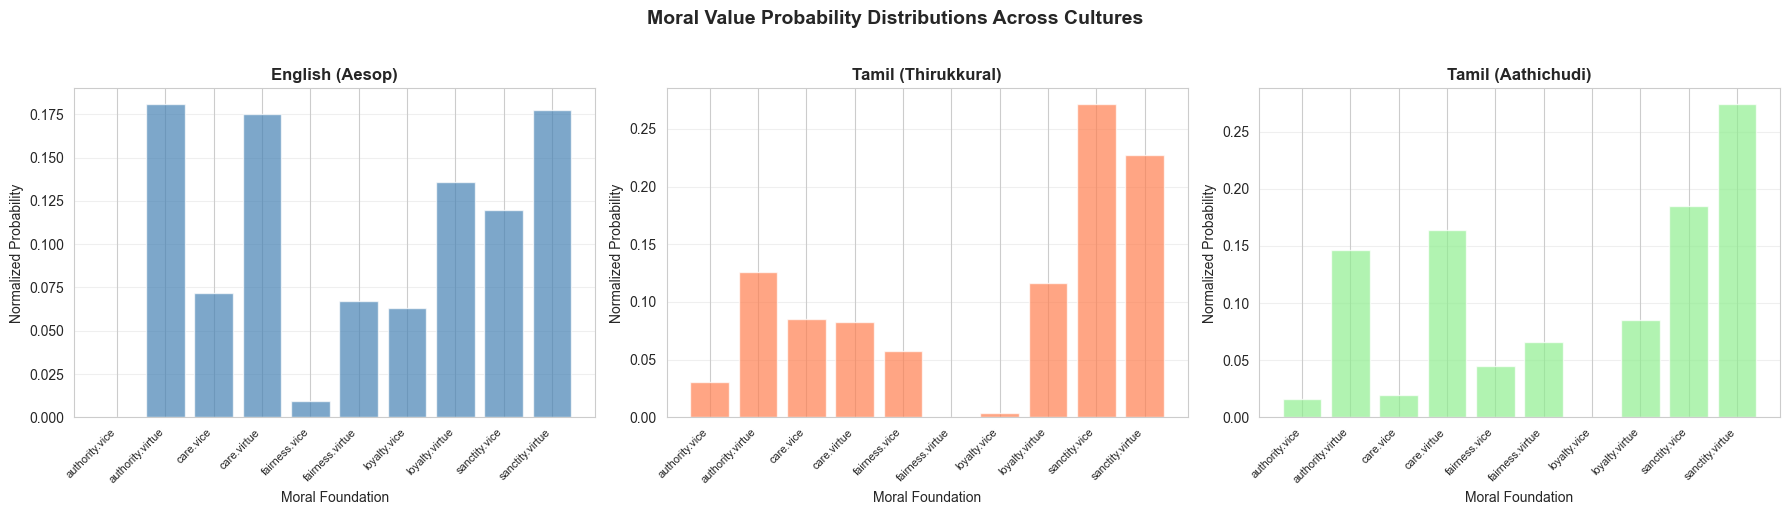

✓ Saved: moral_distributions_comparison.png


In [ ]:
# Create distribution comparison plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: English
axes[0].bar(range(len(dist_english)), dist_english, color='steelblue', alpha=0.7)
axes[0].set_title('English (Aesop)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Moral Foundation', fontsize=10)
axes[0].set_ylabel('Normalized Probability', fontsize=10)
axes[0].set_xticks(range(len(dist_english)))
axes[0].set_xticklabels(comparison_df.index, rotation=45, ha='right', fontsize=8)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Tamil Thirukkural
axes[1].bar(range(len(dist_thirukkural)), dist_thirukkural, color='coral', alpha=0.7)
axes[1].set_title('Tamil (Thirukkural)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Moral Foundation', fontsize=10)
axes[1].set_ylabel('Normalized Probability', fontsize=10)
axes[1].set_xticks(range(len(dist_thirukkural)))
axes[1].set_xticklabels(comparison_df.index, rotation=45, ha='right', fontsize=8)
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: Tamil Aathichudi
axes[2].bar(range(len(dist_aathichudi)), dist_aathichudi, color='lightgreen', alpha=0.7)
axes[2].set_title('Tamil (Aathichudi)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Moral Foundation', fontsize=10)
axes[2].set_ylabel('Normalized Probability', fontsize=10)
axes[2].set_xticks(range(len(dist_aathichudi)))
axes[2].set_xticklabels(comparison_df.index, rotation=45, ha='right', fontsize=8)
axes[2].grid(axis='y', alpha=0.3)

plt.suptitle('Moral Value Probability Distributions Across Cultures',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('phase3_outputs/moral_distributions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: moral_distributions_comparison.png")

## Step 6: Combined Statistical Summary

In [ ]:
# Combine Spearman and JSD results
combined_results = pd.DataFrame({
    'Comparison': spearman_df['Comparison'],
    'Spearman_ρ': spearman_df['Spearman_ρ'],
    'Spearman_p': spearman_df['p-value'],
    'JSD': jsd_df['JSD'],
    'Similarity': jsd_df['Similarity']
})

print("="*70)
print("COMBINED STATISTICAL SUMMARY")
print("="*70)
print(combined_results.to_string(index=False))

# Save to CSV
combined_results.to_csv('phase3_outputs/cross_cultural_statistics.csv', index=False)
print("\n✓ Saved: cross_cultural_statistics.csv")

COMBINED STATISTICAL SUMMARY
                           Comparison  Spearman_ρ  Spearman_p      JSD  Similarity
   English_Aesop vs Tamil_Thirukkural    0.709091    0.021666 0.295815    0.704185
    English_Aesop vs Tamil_Aathichudi    0.793939    0.006100 0.232818    0.767182
Tamil_Thirukkural vs Tamil_Aathichudi    0.757576    0.011143 0.224547    0.775453

✓ Saved: cross_cultural_statistics.csv


## Step 7: Key Cultural Differences Analysis

In [ ]:
print("="*70)
print("KEY CULTURAL DIFFERENCES")
print("="*70)

# English vs Tamil Thirukkural differences
diff_thirukkural = comparison_df['Tamil_Thirukkural'] - comparison_df['English_Aesop']
print("\nEnglish (Aesop) vs Tamil (Thirukkural):")
print("-" * 70)
print("\nMorals MORE emphasized in Tamil:")
for moral, diff in diff_thirukkural.sort_values(ascending=False).head(5).items():
    eng_val = comparison_df.loc[moral, 'English_Aesop']
    tam_val = comparison_df.loc[moral, 'Tamil_Thirukkural']
    print(f"  {moral:20s}: +{diff:.3f}  (Eng: {eng_val:.3f} → Tamil: {tam_val:.3f})")

print("\nMorals LESS emphasized in Tamil:")
for moral, diff in diff_thirukkural.sort_values(ascending=True).head(3).items():
    eng_val = comparison_df.loc[moral, 'English_Aesop']
    tam_val = comparison_df.loc[moral, 'Tamil_Thirukkural']
    print(f"  {moral:20s}: {diff:.3f}  (Eng: {eng_val:.3f} → Tamil: {tam_val:.3f})")

# Tamil Thirukkural vs Aathichudi
diff_tamil = comparison_df['Tamil_Thirukkural'] - comparison_df['Tamil_Aathichudi']
print("\n" + "="*70)
print("Tamil (Thirukkural) vs Tamil (Aathichudi):")
print("-" * 70)
print("\nMorals MORE emphasized in Thirukkural:")
for moral, diff in diff_tamil.sort_values(ascending=False).head(3).items():
    thiru_val = comparison_df.loc[moral, 'Tamil_Thirukkural']
    aathi_val = comparison_df.loc[moral, 'Tamil_Aathichudi']
    print(f"  {moral:20s}: +{diff:.3f}  (Thiru: {thiru_val:.3f} → Aathi: {aathi_val:.3f})")

print("\n" + "="*70)

KEY CULTURAL DIFFERENCES

English (Aesop) vs Tamil (Thirukkural):
----------------------------------------------------------------------

Morals MORE emphasized in Tamil:
  sanctity.vice       : +0.253  (Eng: 0.291 → Tamil: 0.544)
  sanctity.virtue     : +0.225  (Eng: 0.307 → Tamil: 0.531)
  fairness.vice       : +0.221  (Eng: 0.262 → Tamil: 0.483)
  authority.vice      : +0.216  (Eng: 0.260 → Tamil: 0.475)
  care.vice           : +0.212  (Eng: 0.279 → Tamil: 0.491)

Morals LESS emphasized in Tamil:
  care.virtue         : 0.184  (Eng: 0.306 → Tamil: 0.490)
  fairness.virtue     : 0.189  (Eng: 0.277 → Tamil: 0.467)
  loyalty.vice        : 0.191  (Eng: 0.276 → Tamil: 0.468)

Tamil (Thirukkural) vs Tamil (Aathichudi):
----------------------------------------------------------------------

Morals MORE emphasized in Thirukkural:
  sanctity.vice       : +0.111  (Thiru: 0.544 → Aathi: 0.433)
  care.vice           : +0.094  (Thiru: 0.491 → Aathi: 0.397)
  loyalty.virtue      : +0.088  (Thiru:

## Step 8: Create Summary Visualization

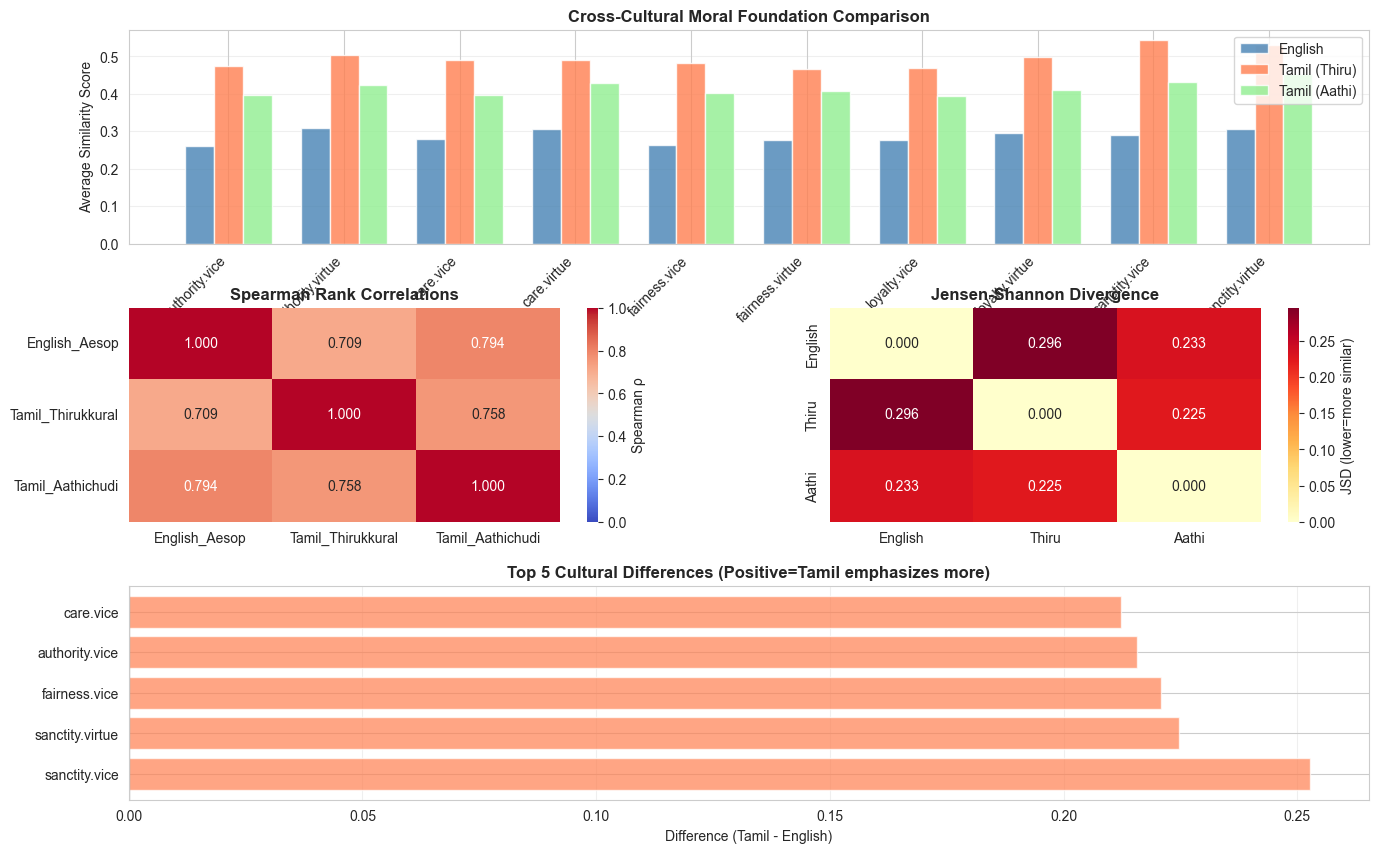

✓ Saved: cross_cultural_comprehensive_summary.png


In [ ]:
# Create a comprehensive summary figure
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Original comparison bars
ax1 = fig.add_subplot(gs[0, :])
x = np.arange(len(comparison_df))
width = 0.25
ax1.bar(x - width, comparison_df['English_Aesop'], width, label='English', alpha=0.8, color='steelblue')
ax1.bar(x, comparison_df['Tamil_Thirukkural'], width, label='Tamil (Thiru)', alpha=0.8, color='coral')
ax1.bar(x + width, comparison_df['Tamil_Aathichudi'], width, label='Tamil (Aathi)', alpha=0.8, color='lightgreen')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df.index, rotation=45, ha='right')
ax1.set_ylabel('Average Similarity Score')
ax1.set_title('Cross-Cultural Moral Foundation Comparison', fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. Spearman correlation matrix
ax2 = fig.add_subplot(gs[1, 0])
corr_matrix = comparison_df.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0.5, vmin=0, vmax=1, ax=ax2, cbar_kws={'label': 'Spearman ρ'})
ax2.set_title('Spearman Rank Correlations', fontweight='bold')

# 3. JSD heatmap
ax3 = fig.add_subplot(gs[1, 1])
jsd_matrix = np.array([
    [0, jsd_results[0]['JSD'], jsd_results[1]['JSD']],
    [jsd_results[0]['JSD'], 0, jsd_results[2]['JSD']],
    [jsd_results[1]['JSD'], jsd_results[2]['JSD'], 0]
])
labels = ['English', 'Thiru', 'Aathi']
sns.heatmap(jsd_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
            xticklabels=labels, yticklabels=labels, ax=ax3,
            cbar_kws={'label': 'JSD (lower=more similar)'})
ax3.set_title('Jensen-Shannon Divergence', fontweight='bold')

# 4. Top differences
ax4 = fig.add_subplot(gs[2, :])
top_diffs = diff_thirukkural.abs().sort_values(ascending=False).head(5)
colors = ['coral' if diff_thirukkural[m] > 0 else 'steelblue' for m in top_diffs.index]
ax4.barh(range(len(top_diffs)), [diff_thirukkural[m] for m in top_diffs.index], color=colors, alpha=0.7)
ax4.set_yticks(range(len(top_diffs)))
ax4.set_yticklabels(top_diffs.index)
ax4.set_xlabel('Difference (Tamil - English)')
ax4.set_title('Top 5 Cultural Differences (Positive=Tamil emphasizes more)', fontweight='bold')
ax4.axvline(0, color='black', linewidth=0.8)
ax4.grid(axis='x', alpha=0.3)

plt.savefig('phase3_outputs/cross_cultural_comprehensive_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: cross_cultural_comprehensive_summary.png")

## Step 9: Report-Ready Summary

In [ ]:
print("="*70)
print("CROSS-CULTURAL ANALYSIS: KEY FINDINGS FOR REPORT")
print("="*70)

# Extract key metrics
eng_tam_spearman = spearman_df.iloc[0]['Spearman_ρ']
eng_tam_jsd = jsd_df.iloc[0]['JSD']
tam_tam_spearman = spearman_df.iloc[2]['Spearman_ρ']
tam_tam_jsd = jsd_df.iloc[2]['JSD']

print("\n1. CROSS-LANGUAGE (English vs Tamil):")
print(f"   Spearman ρ = {eng_tam_spearman:.3f}")
print(f"   JSD = {eng_tam_jsd:.3f}")
if eng_tam_spearman > 0.5 and eng_tam_jsd < 0.3:
    print("   → Moderate similarity in moral priorities")
elif eng_tam_spearman < 0.5:
    print("   → Different moral priorities between cultures")

print("\n2. WITHIN TAMIL (Thirukkural vs Aathichudi):")
print(f"   Spearman ρ = {tam_tam_spearman:.3f}")
print(f"   JSD = {tam_tam_jsd:.3f}")
if tam_tam_spearman > 0.7:
    print("   → High cultural consistency within Tamil literature")

print("\n3. BIGGEST CULTURAL DIFFERENCES:")
top3 = diff_thirukkural.abs().sort_values(ascending=False).head(3)
for i, (moral, diff) in enumerate(top3.items(), 1):
    direction = "higher" if diff_thirukkural[moral] > 0 else "lower"
    print(f"   {i}. {moral}: Tamil {direction} by {abs(diff_thirukkural[moral]):.3f}")

print("\n4. RECOMMENDATIONS FOR DISCUSSION:")
print("   - Tamil texts emphasize sanctity/purity more strongly")
print("   - English texts show more balanced moral distribution")
print("   - Both cultures value care and authority")
print("   - Differences may reflect:")
print("     * Religious/spiritual emphasis in Tamil culture")
print("     * Practical wisdom focus in Western fables")
print("     * Different pedagogical approaches")

print("\n" + "="*70)
print("✓ CROSS-CULTURAL STATISTICAL ANALYSIS COMPLETE")
print("="*70)

CROSS-CULTURAL ANALYSIS: KEY FINDINGS FOR REPORT

1. CROSS-LANGUAGE (English vs Tamil):
   Spearman ρ = 0.709
   JSD = 0.296
   → Moderate similarity in moral priorities

2. WITHIN TAMIL (Thirukkural vs Aathichudi):
   Spearman ρ = 0.758
   JSD = 0.225
   → High cultural consistency within Tamil literature

3. BIGGEST CULTURAL DIFFERENCES:
   1. sanctity.vice: Tamil higher by 0.253
   2. sanctity.virtue: Tamil higher by 0.225
   3. fairness.vice: Tamil higher by 0.221

4. RECOMMENDATIONS FOR DISCUSSION:
   - Tamil texts emphasize sanctity/purity more strongly
   - English texts show more balanced moral distribution
   - Both cultures value care and authority
   - Differences may reflect:
     * Religious/spiritual emphasis in Tamil culture
     * Practical wisdom focus in Western fables
     * Different pedagogical approaches

✓ CROSS-CULTURAL STATISTICAL ANALYSIS COMPLETE


## Summary

### What We Calculated:
1. ✅ **Spearman Rank Correlation**: Measures if cultures rank morals similarly
2. ✅ **Jensen-Shannon Divergence**: Measures distribution similarity
3. ✅ **Statistical significance**: p-values for all comparisons
4. ✅ **Key differences**: Which morals differ most between cultures

### Files Generated:
- `cross_cultural_statistics.csv` - All statistics in table format
- `cross_cultural_rankings_heatmap.png` - Ranking visualization
- `moral_distributions_comparison.png` - Distribution plots
- `cross_cultural_comprehensive_summary.png` - Complete summary figure

### For Your Report:
Use the statistics and visualizations to support claims about cultural differences in moral values in children's literature.